In [1]:
include("src/pkgs.jl")

#using PyPlot
#using Pipe
using Gadfly
using FreqTables
using DataFrames

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
include("src/riot.jl")
using Main.Riot

In [3]:
leagues = ["challenger"]
leagues = ["challenger", "grandmaster", "master"]
#length(map(scrape_league, leagues))

3-element Vector{String}:
 "challenger"
 "grandmaster"
 "master"

In [4]:
rd = matches_df()

Main.Riot.RiotData(53856×6 DataFrame
   Row │ Placement  Level  DamageToPlayers  LastRound  MatchID         PUUID   ⋯
       │ Int64      Int64  Int64            Int64      String          String  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │         2      8              159         35  NA1_4311576993  R9-HCYN ⋯
     2 │         5      9               82         30  NA1_4311576993  KpzadE2
     3 │         1      8              167         35  NA1_4311576993  GMjvt6E
     4 │         6      8               71         28  NA1_4311576993  6qcMBES
     5 │         7      8               69         28  NA1_4311576993  42jLPfs ⋯
     6 │         4      8               96         31  NA1_4311576993  Sofvtkx
     7 │         3      9              102         33  NA1_4311576993  UYUC--K
     8 │         8      8               46         26  NA1_4311576993  YudpBvb
     9 │         1      9              171         37  NA1_4316885995  2ZuOR62 ⋯
   

In [5]:
Gadfly.push_theme(:dark)
set_default_plot_size(36cm, 15cm)

function plot_freq(df::DataFrame, col::Symbol, ptitle, rev=true, limit=50)
    ft = freqtable(df, col)
    df = DataFrame(Label = names(ft)[1], Freq = ft)
    sort!(df, [:Freq], rev=rev)
    df = first(df, limit)
    p = plot(df, x=:Label, y=:Freq, Geom.bar(position=:dodge))
    title(hstack(p), ptitle)
end

plot_freq (generic function with 3 methods)

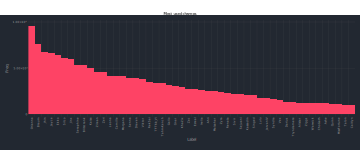

In [6]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> 0 < r.Placement <= 3, data)

plot_freq(data, :CharacterID, "Most used champs")

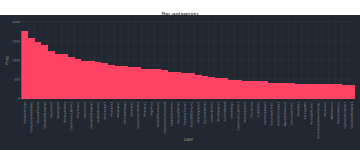

In [7]:
data = innerjoin(rd.augments, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> 0 < r.Placement <= 3, data)

plot_freq(data, :Augment, "Most used augments")

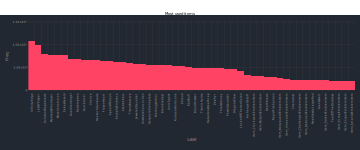

In [8]:
data = innerjoin(rd.items, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> 0 < r.Placement <= 3, data)

plot_freq(data, :Item, "Most used items")

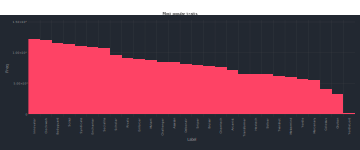

In [9]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> 0 < r.Placement <= 3, data)

plot_freq(data, :Trait, "Most popular traits")